In [65]:
import random
import math
from collections import Counter
import matplotlib.pyplot as plt
from decimal import Decimal

In [84]:
def n_digit(x, n=1):
    x = Decimal(x)
    while x > 10:
        x /= 10
    for _ in range(n - 1):
        x = x % 1 * 10
    return math.floor(x)


def gen_benford(n=1, samples=1000, iterations=10000, max_num=100000):
    rands = list(random.randint(0, max_num) for x in range(samples))
    for _ in range(samples * iterations):
        i = random.randrange(0, samples)
        rands[i] *= random.choice([1.01, 0.99])

    benford_digits = [n_digit(x, n=n) for x in rands]

    counts = Counter(benford_digits)
    ratios = list(zip(*[(x, y / samples) for x, y in counts.items()]))
    plt.bar(x=ratios[0], height=ratios[1])
    plt.show()
    return ratios

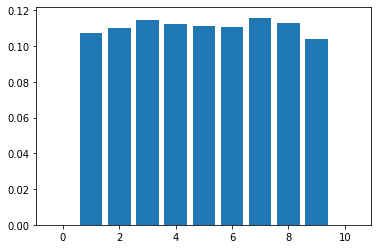

In [85]:
# RANDOM NUMBERS
samples = 10000
rands = (random.randint(0, 100000) for x in range(samples))

benford_digits = [n_digit(x) for x in rands]

counts = Counter(benford_digits)
ratios = list(zip(*[(x, y / samples) for x, y in counts.items()]))
plt.bar(x=ratios[0], height=ratios[1])
plt.show()

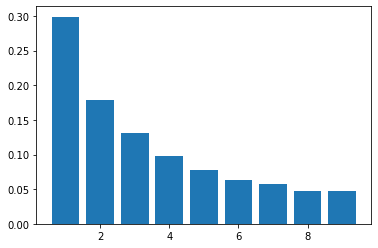

In [83]:
# RANDOM NUMBERS WITH RANDOM MULTIPLICITIVE VARIANCE
ratios = gen_benford()

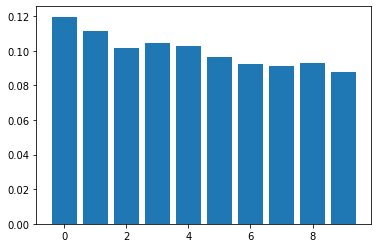

In [78]:
# SECOND DIGIT - RANDOM NUMBERS WITH RANDOM MULTIPLICITIVE VARIANCE
ratios = gen_benford(n=2, samples=10000)

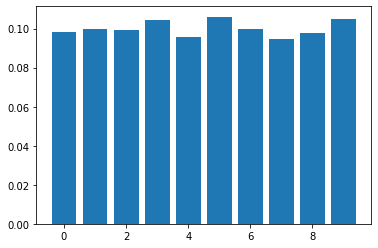

In [77]:
# THIRD DIGIT - RANDOM NUMBERS WITH RANDOM MULTIPLICITIVE VARIANCE
ratios = gen_benford(n=3, samples=10000)

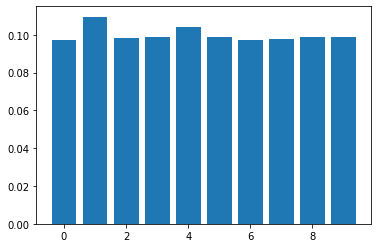

In [76]:
# FOURTH DIGIT - RANDOM NUMBERS WITH RANDOM MULTIPLICITIVE VARIANCE
ratios = gen_benford(n=4, samples=10000)

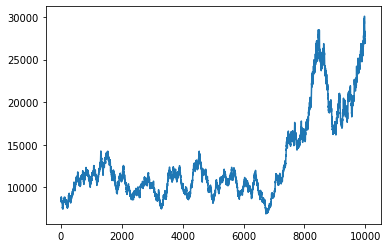

27198.196156573118


In [95]:
# EVOLUTION OF A NUMBER THROUGH MULTIPLICITIVE VARIANCES
arr = [random.randint(0, 10000)]
for _ in range(10000):
    arr.append(arr[-1] * random.choice([1.01, 0.99]))
plt.plot(arr)
plt.show()
print(arr[-1])